# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100) #0 to 100, no intervals.
#y = x*2
#z = x**2

In [3]:
y = x*2

In [4]:
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

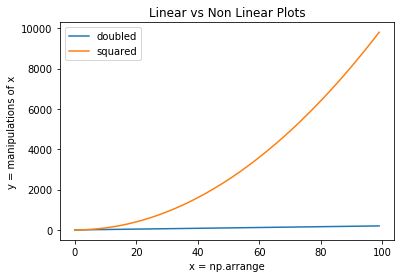

<Figure size 432x288 with 0 Axes>

In [5]:
# Method 1

plt.plot(x, y, label='doubled')
plt.plot(x, z, label='squared')   ## The inclination is there, but hard to see because of scale. 

plt.xlabel('x = np.arrange')
plt.ylabel('y = manipulations of x')

plt.title("Linear vs Non Linear Plots")
plt.legend()
plt.show()

plt.savefig('fig1.png')

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

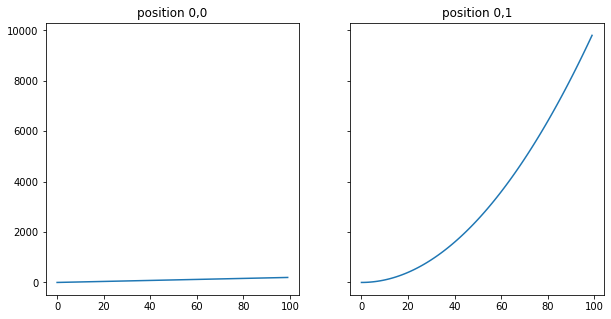

In [6]:
# Method 2

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
ax1.plot(x, y)
ax2.plot(x, z)
ax1.set_title('position 0,0')
ax2.set_title('position 0,1')
plt.savefig('fig2.png')

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

In [7]:
# your code here
#check above

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

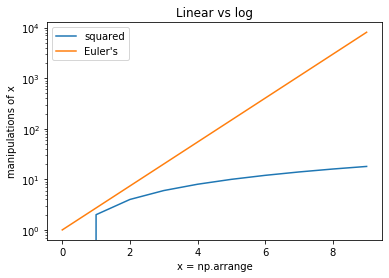

<Figure size 432x288 with 0 Axes>

In [8]:
#normal plot
# your code here
#matplotlib.scale.LinearScale—These are just numbers, like 1, 2, 3.
#matplotlib.scale.LogScale—These are powers of 10. 
#You could use any base, like 2 or the natural logarithm value, 
#which is given by the number e. Using different bases would narrow or widen the spacing of the plotted elements,
#making visibility easier.


import math

x = np.arange(0,10) #0 to 10, becuase I wanted to better understand the plot.
y = x*2
z = math.e**x

plt.plot(x, y, label='squared')
plt.plot(x, z, label='Euler\'s')   ## The inclination is there, but hard to see because of scale. 

plt.xlabel('x = np.arrange')
plt.ylabel('manipulations of x')
plt.xscale("linear")
plt.yscale("log")

plt.title("Linear vs log")
plt.legend()
plt.show()

plt.savefig('fig5.png')

#### As a bonus challenge, try to add a legend to the plot.

In [9]:
# your code here

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [10]:
# your code here

fitbit = pd.read_csv('Fitbit2.csv')
fitbit.head(5)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [11]:
fitbit[['Work_or_Weekend','Months_encoded']]
fitbit.head(5)
#first one is a condition (True and False)
# I want one value per month. You group.

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [12]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here

months = fitbit.groupby('Months_encoded').agg({'Steps':'median'})
months

,Steps
Months_encoded,
1,10366.0
2,9235.0
3,11122.0
4,13846.5
5,11998.0
6,12935.5
7,10644.0
8,12213.0
9,9343.0


In [13]:
# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here

weeks = fitbit.groupby('Work_or_Weekend').agg({'Steps':'median'}) #zero = sat & sunday
weeks

,Steps
Work_or_Weekend,
0,9998.0
1,10445.5


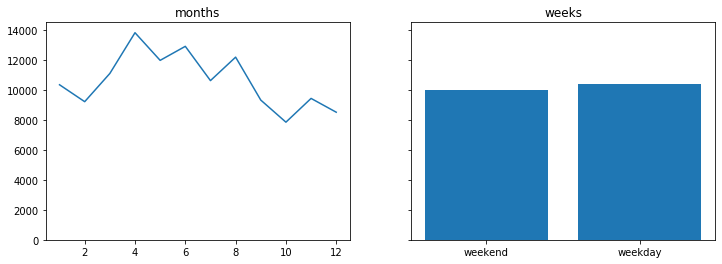

In [14]:
f, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 4))
names = ('weekend','weekday')
axes[0].plot(months['Steps'])
axes[1].bar(names, weeks['Steps'])

axes[0].set_title('months')
axes[1].set_title('weeks')

plt.savefig('fig6.png') #check how to save it

In [15]:
#Explore plt.sca
#0,0 and 0,1



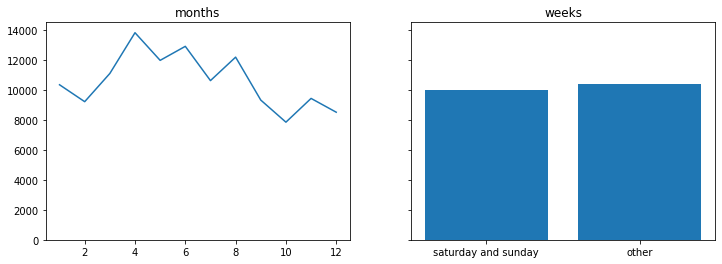

In [17]:
#couldn't use xticks to change the fist plot. I don't know why only works on the second one.
# ref; https://kite.com/python/answers/how-to-replace-tick-labels-of-a-subplot-with-matplotlib-in-python
    
f, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 4))

axes[0].plot(months['Steps'])
plt.xticks([0,1,2,3,4,5], ['feb','apr','jun','aug','oct','dez'])

axes[1].bar(names, weeks['Steps'])
plt.xticks([0,1], ["saturday and sunday", "other"])

axes[0].set_title('months')
axes[1].set_title('weeks')

plt.show()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

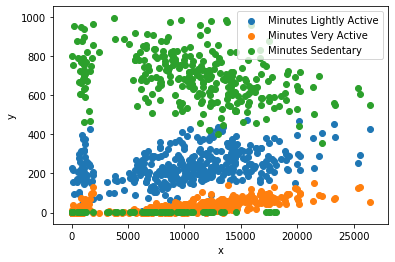

In [19]:
#Write a loop to plot 3 scatter plots of the following features:¶
#Minutes Lightly Active vs Steps
#Minutes Very Active vs Steps
#Minutes Sedentary vs Steps


#fig, ax = plt.subplots()
short = fitbit[['Steps','Minutes Lightly Active','Minutes Very Active','Minutes Sedentary']]
y = short.columns[1:]

for col in y:
    plt.scatter(fitbit['Steps'], fitbit[col])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(y)

plt.savefig('fig8.png')

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [20]:
# your code here

titanic = pd.read_csv('titanic.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
5,6,0.0,3,"Moran, Mr. James",male,23.926502,0,0,330877,8.4583,U0,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,U0,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,U0,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,U0,C


#### Explore the titanic dataset using Pandas dtypes.

In [21]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [22]:
# NUMERICAL VARIABLES
titanic.select_dtypes(include=['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [23]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(exclude=['number'])

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [24]:
# your code here

#fig, ax = plt.subplots()
#sb.set_style("ticks", {"xtick.major.size": 12, "ytick.major.size": 6})

In [25]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Use the right visulalization to show the distribution of column `Age`.

In [26]:
# your code here

titanic["Age"] = titanic["Age"].fillna(0.0).astype(int)
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,U0,S


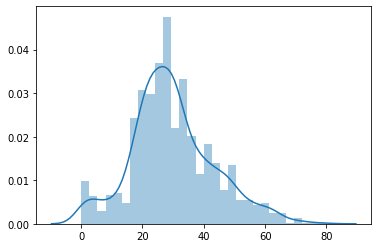

In [28]:
# Load data
#titanic = sns.load_dataset("titanic")

#I don't get why Seaborn would convert my column names to lowercase.
x = list(titanic["Age"])

# Construct plot
sb.distplot(x);

# Show plot
plt.show()


#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

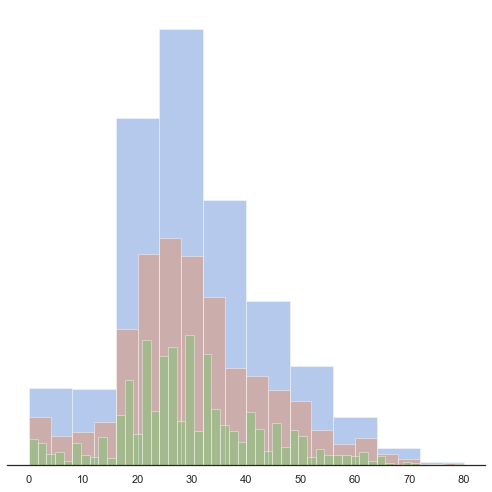

In [29]:
# your code here
sb.set(style="white", palette="muted", color_codes=True)


# Set up the matplotlib figure
f, axes = plt.subplots(1, figsize=(7, 7), sharex=True)
sb.despine(left=True)


# Plot a simple histogram with binsize determined automatically
sb.distplot(x, bins=10, kde=False)
sb.distplot(x, bins=20, kde=False)
sb.distplot(x, bins=50, kde=False)



plt.setp(axes, yticks=[])
plt.tight_layout()

plt.savefig('fig9.png')

#### How does the bin size affect your plot?

In [ ]:
"""
it's easier to see a higher concentration of ages between 20 and 30 years, but at  the same time the bins 
of 10 don't seem very accurate
"""

#### Use seaborn to show the distribution of column `Age`.

In [ ]:
# your code here
#I think I did already

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

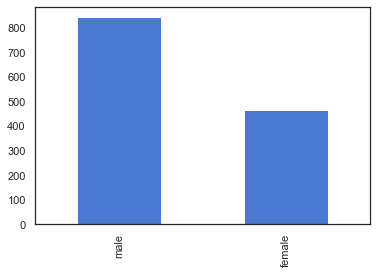

In [31]:
# Method 1 - matplotlib
# your code here

titanic['Gender'].value_counts().plot(kind='bar')

#titanic.head()

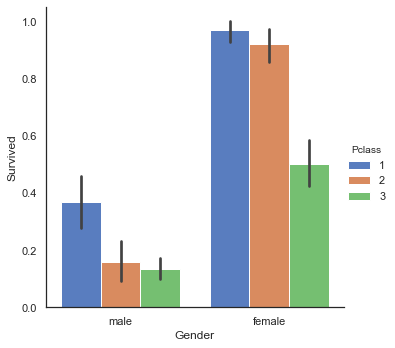

In [34]:
# Method 2 - seaborn
# your code here

#found in https://seaborn.pydata.org/tutorial/categorical.html
#but I don't understand "survived" here. Is it counting "1"s ?
sb.catplot(x="Gender", y="Survived", hue="Pclass", kind="bar", data=titanic);

plt.savefig('fig10.png')

#### Use the right plot to visualize the column `Pclass`.

In [ ]:
# your code here

#Showed above

In [35]:
#something went wrong, importing again.
tit = pd.read_csv('titanic.csv')
tit.head(5)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [36]:
# your code here

desc = tit['Age'].describe()
tit_age = pd.DataFrame(desc)
tit_age


,Age
count,1309.000000
mean,29.879186
std,13.448335
min,0.170000
25%,22.000000
50%,28.500000
75%,37.000000
max,80.000000


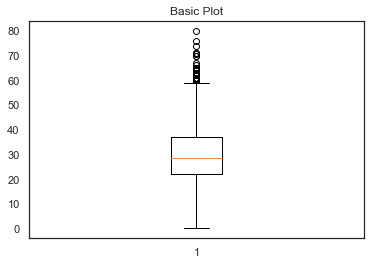

In [38]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(tit['Age'])

plt.savefig('fig11.png')

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
Shows min(), 25%, median, 75%, max() and outliers. No info for count, std and mean.
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

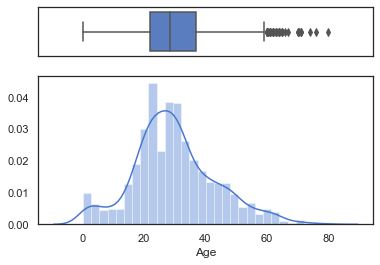

In [40]:
# your code here
#  https://python-graph-gallery.com/24-histogram-with-a-boxplot-on-top-seaborn/


f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)})
 
# Add a graph in each part

sb.boxplot(tit['Age'], ax = ax_box)
sb.distplot(tit['Age'], ax = ax_hist)

 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.savefig('fig12.png')


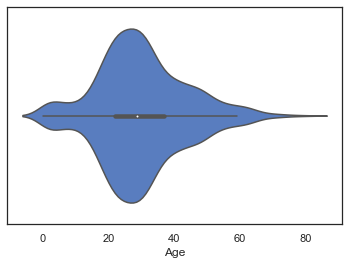

In [42]:
#or .....
sb.violinplot("Age", data = tit)

plt.savefig('fig13.png')

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
quantities
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

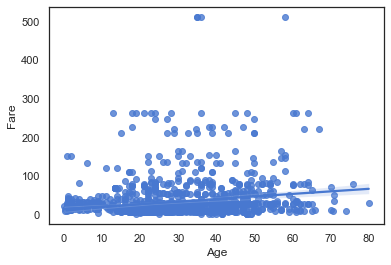

In [43]:
# Method 1 - matplotlib
# your code here


#vehicles.sort_values(by=["CO2 Emission Grams/Mile", "City MPG", "Highway MPG"], inplace=True)
sb.regplot(x="Age", y="Fare", data = tit)
# pandas also has a sublibrary for visualization. This one is only pandas. 
#sns.regplot(x="NumberOfAwakings", y="MinutesOfBeingAwake", data=data)

plt.savefig('fig13.png')

In [ ]:
# Method 2 - seaborn
# your code here

#### Plot the correlation matrix using seaborn.

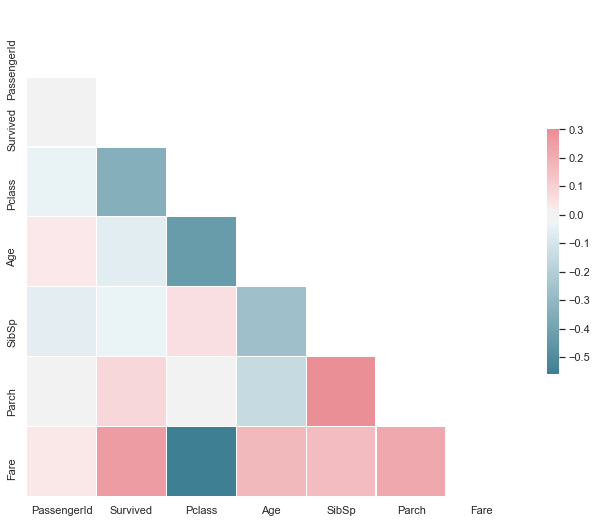

In [44]:
# your code here

corr = tit.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True)

sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig('fig14.png')

#### What are the most correlated features?

In [ ]:
"""
Class X Fare, Class x Age.
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [ ]:
# your code here

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here